# Statistics Tutorial – TD1

## 1 – Data

In [1]:
import sys
print(sys.executable)
print(sys.version)
!"{sys.executable}" -m pip install --upgrade pip
!"{sys.executable}" -m pip install statsmodels

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# Define the main path
mainpath = r"C:/Users/Emile/Desktop/cours/ESILV/A4/S2/SPECIALISATION_IF/ML&AM/TD1/"
# Load the data
all_assets_prices = pd.read_csv(f"{mainpath}DataForStatsTutorial1.csv", index_col="Dates", sep=";", parse_dates=["Dates"], dayfirst=True)
#all_assets_prices = pd.read_csv("DataForStatsTutorial1.csv", index_col=0, sep=";", parse_dates=True, dayfirst=True)


c:\Users\Emile\AppData\Local\Programs\Python\Python312\python.exe
3.12.1 (tags/v3.12.1:2305ca5, Dec  7 2023, 22:03:25) [MSC v.1937 64 bit (AMD64)]


C:\Users\Emile\AppData\Local\Temp\ipykernel_33480\3502283789.py:7: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


## 2 – Data Exploration

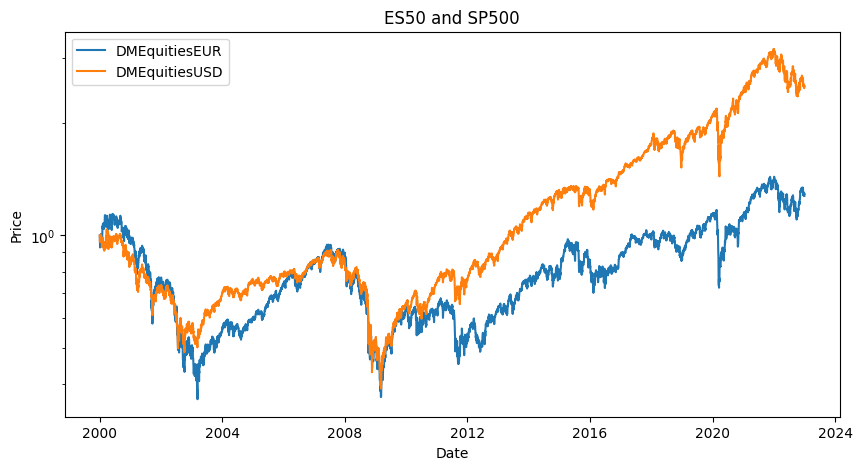

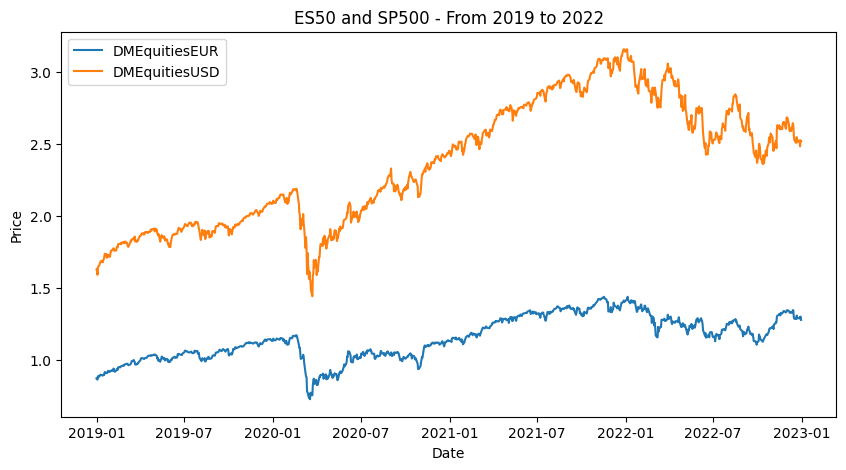

Daily Prices Head:
            DMEquitiesCAD  DMEquitiesFRF  DMEquitiesDEM  DMEquitiesJPY  \
Dates                                                                    
2000-01-03       1.000000       1.000000       1.000000       1.000000   
2000-01-04       0.976075       0.958445       0.975642       0.997246   
2000-01-05       0.964725       0.925859       0.962979       0.959131   
2000-01-06       0.960085       0.920773       0.958869       0.934596   
2000-01-07       1.001680       0.935809       1.004101       0.928449   

            DMEquitiesCHF  DMEquitiesGBP  DMEquitiesUSD  DMEquitiesEUR  \
Dates                                                                    
2000-01-03       1.000000       1.000000       1.000000       1.000000   
2000-01-04       0.960050       0.961770       0.961524       0.960624   
2000-01-05       0.948539       0.942857       0.963296       0.936774   
2000-01-06       0.961604       0.929909       0.964249       0.928391   
2000-01-07       0

C:\Users\Emile\AppData\Local\Temp\ipykernel_33480\2040202974.py:24: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  all_assets_prices_monthly = all_assets_prices.resample('M').last()


In [2]:
# Plot the data
plt.figure(figsize=(10, 5))
plt.plot(all_assets_prices[['DMEquitiesEUR', 'DMEquitiesUSD']])
plt.yscale("log")
plt.title("ES50 and SP500")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend(['DMEquitiesEUR', 'DMEquitiesUSD'])
plt.show()

# Plot a subset of the data
subset = all_assets_prices.loc['2019':'2022', ['DMEquitiesEUR', 'DMEquitiesUSD']]
plt.figure(figsize=(10, 5))
plt.plot(subset)
plt.title("ES50 and SP500 - From 2019 to 2022")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend(['DMEquitiesEUR', 'DMEquitiesUSD'])
plt.show()

# Change frequency
all_assets_prices_daily = all_assets_prices
all_assets_prices_weekly = all_assets_prices.resample('W').last()
all_assets_prices_monthly = all_assets_prices.resample('M').last()

print("Daily Prices Head:")
print(all_assets_prices_daily.head())
print("\nWeekly Prices Head:")
print(all_assets_prices_weekly.head())
print("\nMonthly Prices Head:")
print(all_assets_prices_monthly.head())

def compute_return(price):
    ret = price / price.shift(1) - 1
    return ret

prices_sp = all_assets_prices_daily['DMEquitiesUSD']
returns_sp = compute_return(prices_sp)
returns_sp_check = prices_sp.pct_change()

print("\nReturns SP Head:")
print(returns_sp.head())


## 3 – Usual Statistics

CAGR of SP 500 is: 3.96%
Volatility of SP 500 is: 19.52%


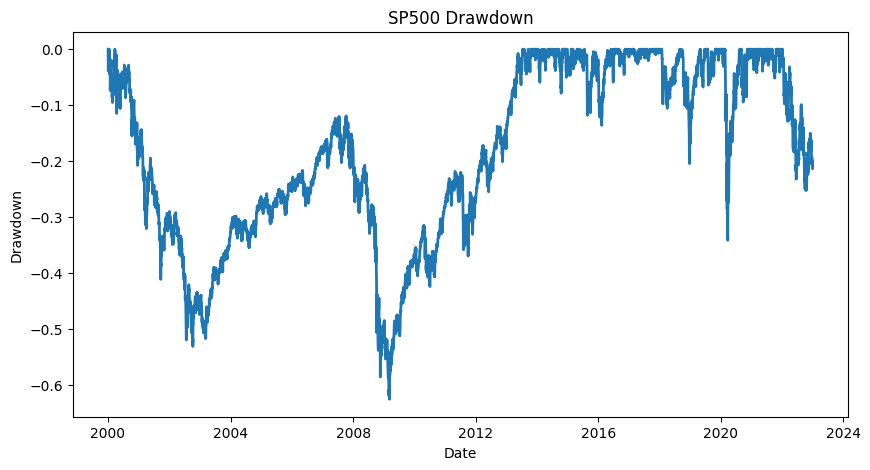

Max Drawdown of SP 500 = -62.63%
Max Drawdown of SP 500 = -62.63%
Sharpe Ratio of SP 500 = 0.1
Sharpe Ratio of SP500 Index (2000-2007) = -0.39
Sharpe Ratio of SP500 Index (2008-2009) = -0.15
Sharpe Ratio of SP500 Index (2010-2022) = -0.24


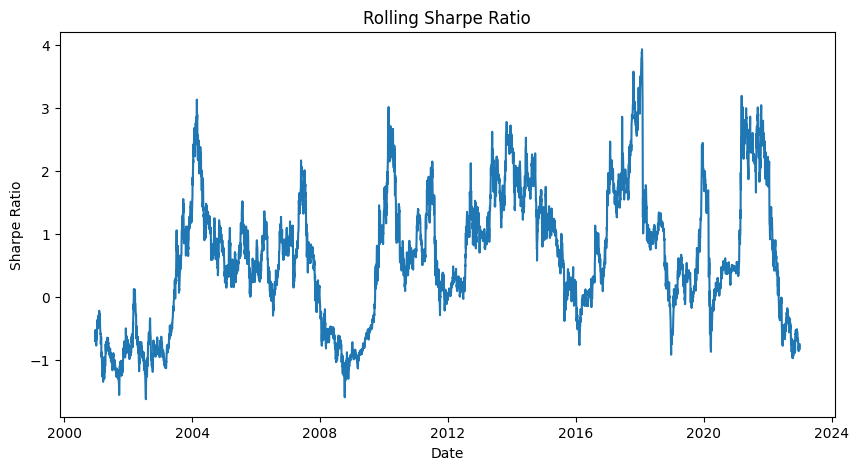

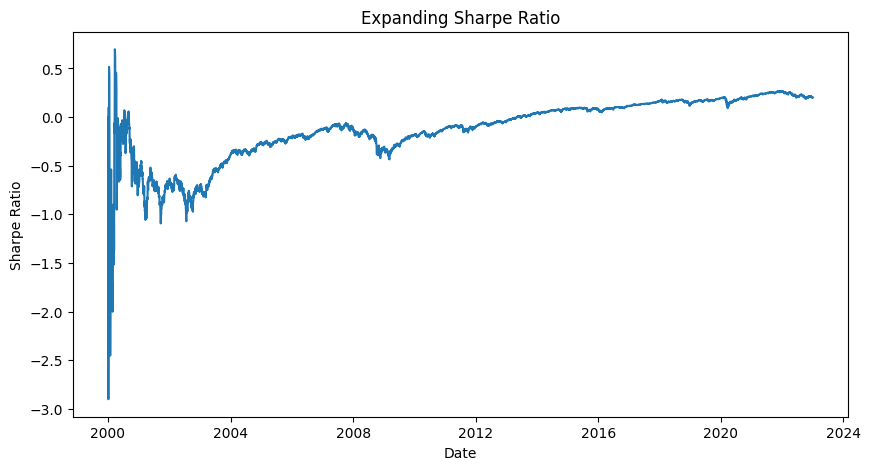

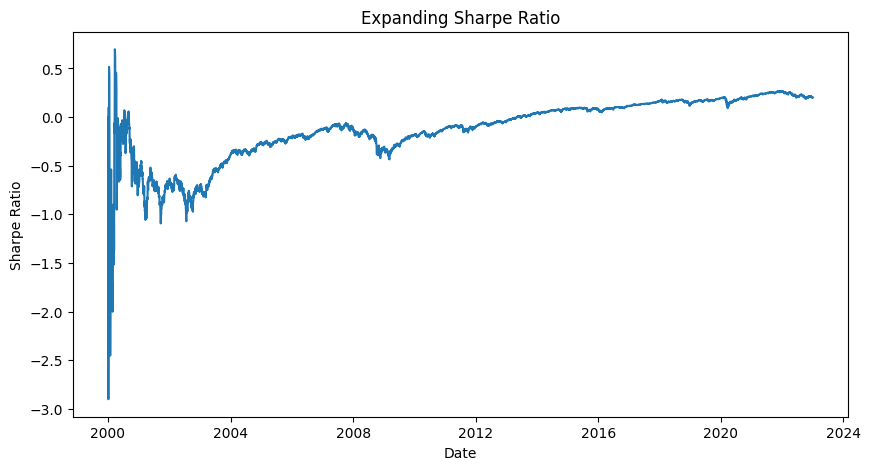

In [3]:
def compute_cagr(price, ann_multiple=252):
    n = len(price)
    cagr = (price.iloc[-1] / price.iloc[0]) ** (ann_multiple / n) - 1
    return cagr

cagr_sp = compute_cagr(all_assets_prices['DMEquitiesUSD'])
print(f'CAGR of SP 500 is: {round(cagr_sp * 100, 2)}%')

def compute_vol(price, ann_multiple=252):
    ret = price / price.shift(-1) - 1
    n = len(price)
    mu = ret.mean()
    sigma_daily = np.sqrt((ret - mu).pow(2).sum() / (n - 1))
    sigma = np.sqrt(252) * sigma_daily
    return sigma

vol_sp = compute_vol(all_assets_prices['DMEquitiesUSD'])
print(f'Volatility of SP 500 is: {round(vol_sp * 100, 2)}%')

sp_returns = all_assets_prices['DMEquitiesUSD'].pct_change()
vol_sp_check = np.sqrt(252)*sp_returns.std()

def compute_dd_np(price):
    price = price.values
    drawdown = price / np.maximum.accumulate(price) - 1
    return drawdown

def compute_dd_pd(df,series):
    series_to_retain = df[series]
    out_df = pd.DataFrame()
    out_df[series] = series_to_retain
    out_df['Cumulative'] = out_df / out_df.iloc[0]
    out_df['Max'] = out_df['Cumulative'].cummax()
    out_df['Drawdown'] = (out_df['Cumulative'] - out_df['Max']) / out_df['Max']
    return out_df

dd_np = compute_dd_np(all_assets_prices['DMEquitiesUSD'])
dd_df = compute_dd_pd(all_assets_prices,'DMEquitiesUSD')

plt.figure(figsize=(10, 5))
plt.plot(dd_df.Drawdown, linewidth=2)
plt.title("SP500 Drawdown")
plt.xlabel("Date")
plt.ylabel("Drawdown")
plt.show()

mdd = np.min(dd_np)
print(f"Max Drawdown of SP 500 = {round(mdd * 100, 2)}%")
print(f"Max Drawdown of SP 500 = {round(dd_df.Drawdown.min() * 100, 2)}%")

def compute_sr(price, ret_without_risk=0.00, ann_multiple=252):
    cagr = compute_cagr(price, ann_multiple)
    vol = compute_vol(price, ann_multiple)
    sr = (cagr - ret_without_risk) / vol
    return sr

rf = 0.02
sr = compute_sr(all_assets_prices['DMEquitiesUSD'], rf, 252)
print(f"Sharpe Ratio of SP 500 = {round(sr, 2)}")

prix_sp_subset1 = all_assets_prices.loc["2001-01-01":"2003-12-31", "DMEquitiesUSD"]
prix_sp_subset2 = all_assets_prices.loc["2001-04-01":"2004-03-31", "DMEquitiesUSD"]
prix_sp_subset3 = all_assets_prices.loc["2001-07-01":"2004-06-30", "DMEquitiesUSD"] 

print(f"Sharpe Ratio of SP500 Index (2000-2007) = {round(compute_sr(prix_sp_subset1, rf, 252), 2)}")
print(f"Sharpe Ratio of SP500 Index (2008-2009) = {round(compute_sr(prix_sp_subset2, rf, 252), 2)}")
print(f"Sharpe Ratio of SP500 Index (2010-2022) = {round(compute_sr(prix_sp_subset3, rf, 252), 2)}")

rolling_sr = all_assets_prices['DMEquitiesUSD'].rolling(window=252).apply(compute_sr, raw=False)
plt.figure(figsize=(10, 5))
plt.plot(rolling_sr)
plt.title("Rolling Sharpe Ratio")
plt.xlabel("Date")
plt.ylabel("Sharpe Ratio")
plt.show()

expanding_sr = all_assets_prices['DMEquitiesUSD'].expanding().apply(compute_sr, raw=False)
expanding_sr[~np.isfinite(expanding_sr)] = 0
plt.figure(figsize=(10, 5))
plt.plot(expanding_sr)
plt.title("Expanding Sharpe Ratio")
plt.xlabel("Date")
plt.ylabel("Sharpe Ratio")
plt.show()

expanding_sr = all_assets_prices['DMEquitiesUSD'].expanding().apply(lambda x: compute_sr(x), raw=False)
expanding_sr[~np.isfinite(expanding_sr)] = 0

plt.figure(figsize=(10, 5))
plt.plot(expanding_sr)
plt.title("Expanding Sharpe Ratio")
plt.xlabel("Date")
plt.ylabel("Sharpe Ratio")
plt.show()


# 4- Calculation of Covariances and Correlations

Covariance Matrix:
               DMEquitiesEUR  DMEquitiesUSD  BondsDEM  BondsGBP  BondsUSD  \
DMEquitiesEUR       0.054230       0.026615 -0.003942 -0.004378 -0.005088   
DMEquitiesUSD       0.026615       0.037927 -0.001829 -0.002070 -0.004058   
BondsDEM           -0.003942      -0.001829  0.002420  0.002300  0.001933   
BondsGBP           -0.004378      -0.002070  0.002300  0.003593  0.002281   
BondsUSD           -0.005088      -0.004058  0.001933  0.002281  0.004660   
DMFXCHF            -0.002165      -0.000705  0.000631  0.000896  0.001223   
DMFXEUR             0.001190       0.001461 -0.000023  0.000225  0.000444   
DMFXGBP             0.003816       0.002824 -0.000176 -0.000515 -0.000008   

                DMFXCHF   DMFXEUR   DMFXGBP  
DMEquitiesEUR -0.002165  0.001190  0.003816  
DMEquitiesUSD -0.000705  0.001461  0.002824  
BondsDEM       0.000631 -0.000023 -0.000176  
BondsGBP       0.000896  0.000225 -0.000515  
BondsUSD       0.001223  0.000444 -0.000008  
DMFXCHF    

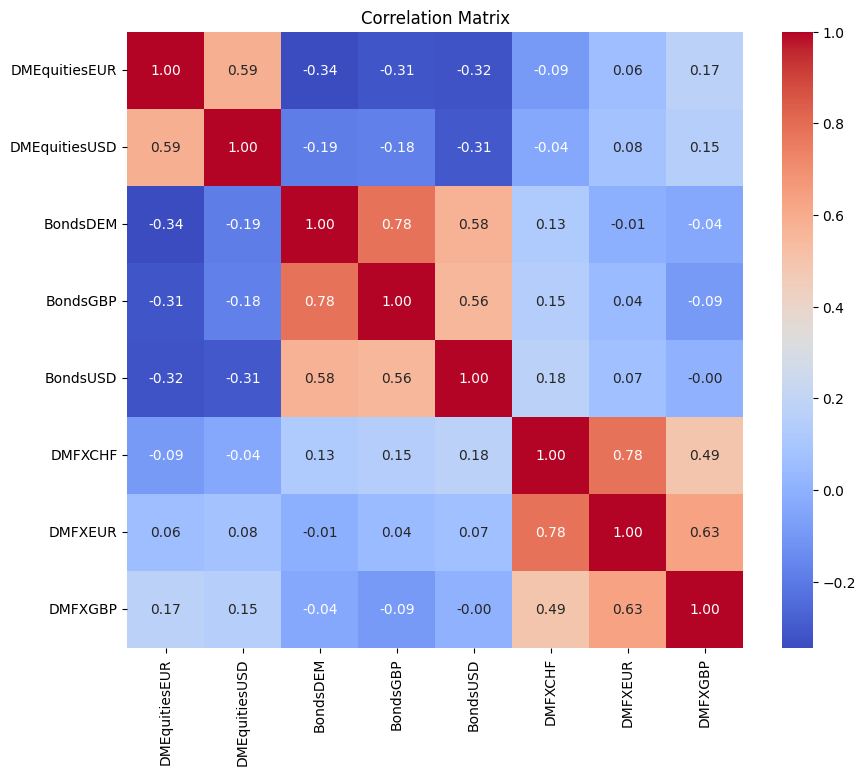

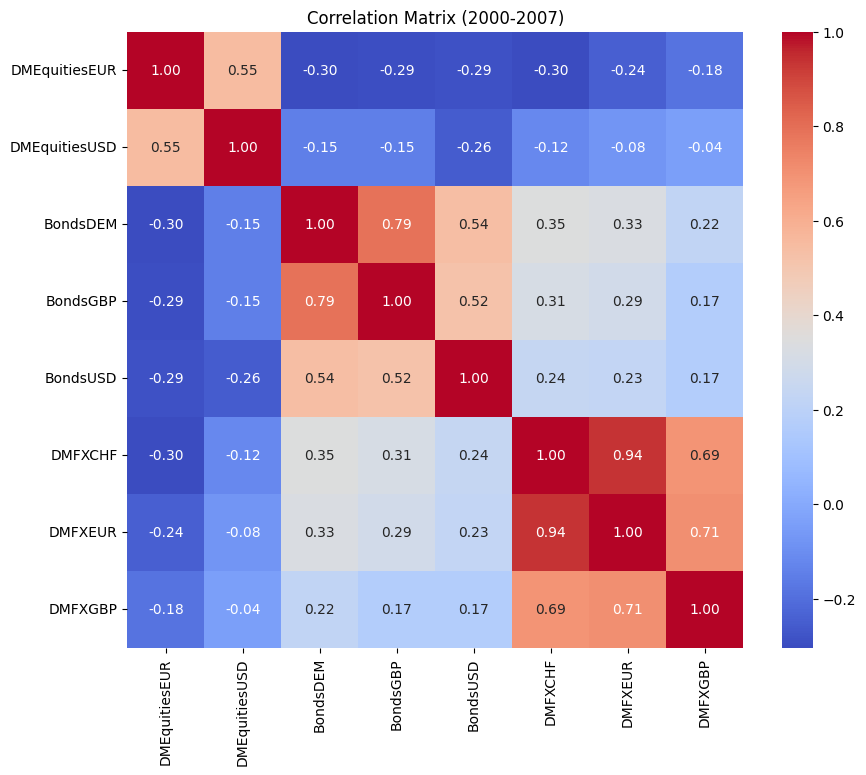

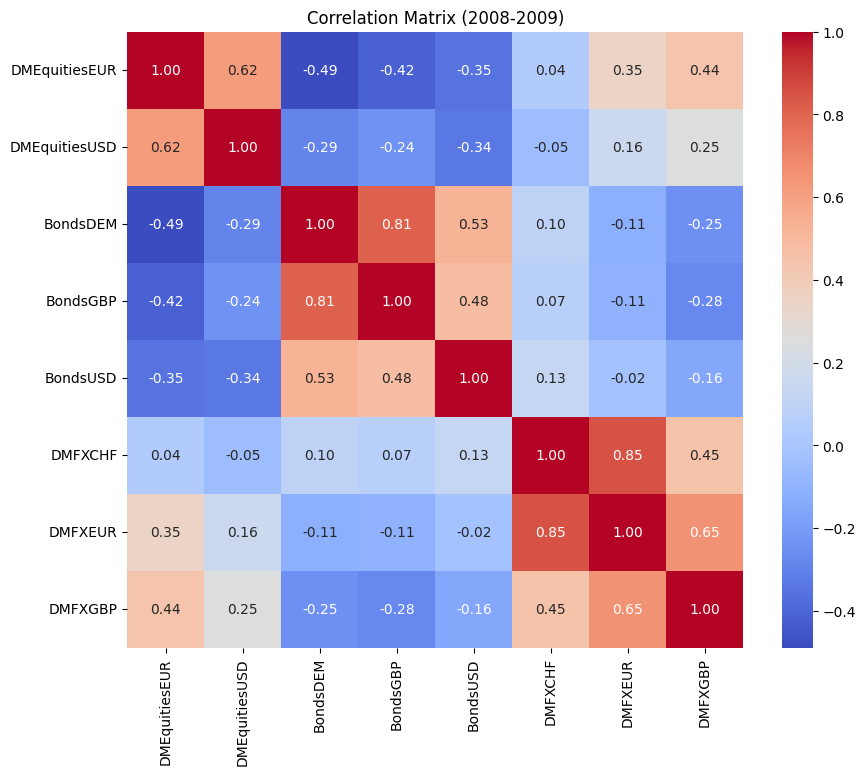

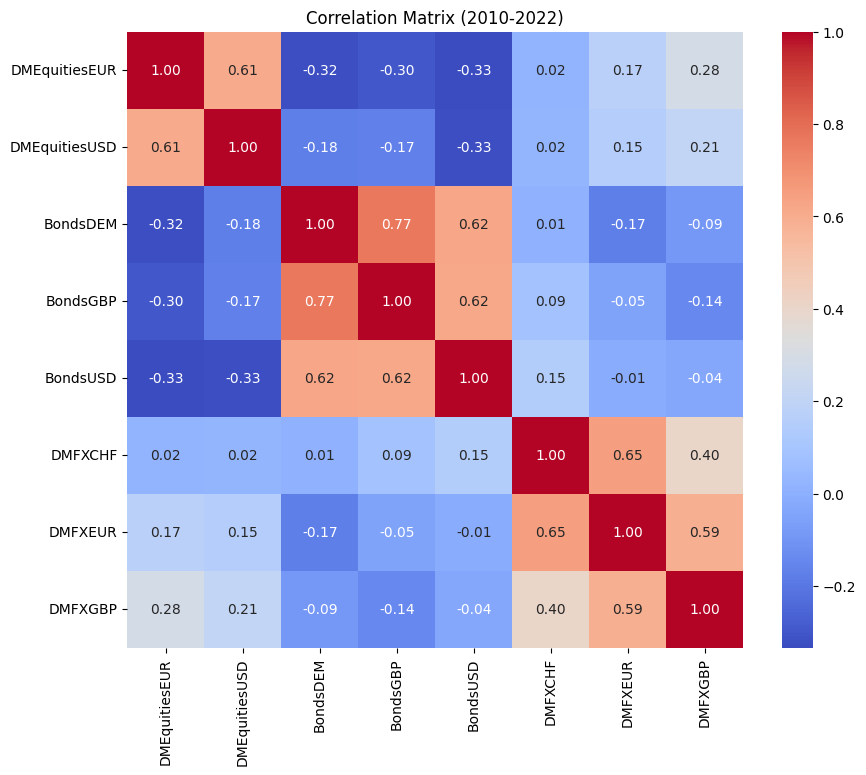

In [4]:
# Get data
eight_assets_prices_daily = all_assets_prices_daily[['DMEquitiesEUR', 'DMEquitiesUSD',
                                                      'BondsDEM', 'BondsGBP',
                                                      'BondsUSD', 'DMFXCHF',
                                                      'DMFXEUR', 'DMFXGBP']]

# Calculate returns
returns = eight_assets_prices_daily.apply(compute_return)  # Apply: Loop for columns
returns = returns.dropna()  # Remove rows that contain NaN

# Covariance calculation
n = returns.shape[0]  # Number of rows
Mc = returns - returns.mean()  # Center the data: M - mean(M)
S = (Mc.T @ Mc) / (n - 1)  # Classic formula

S_check = eight_assets_prices_daily.pct_change().cov()

def cov_mtx(ret, ann_multiple=252):
    cmtx = ret.cov() * ann_multiple
    return cmtx

cov_matrix = cov_mtx(returns)
print("Covariance Matrix:")
print(cov_matrix)

# Verification
print("Checking Covariance Matrix:")
print(cov_mtx(returns) - S * 252)

# Correlation calculation
Ms = (returns - returns.mean(axis=0)) / returns.std(axis=0)   # Centered and scaled data
R = (Ms.T @ Ms) / (n - 1)                   # Correlation matrix


def corr_mtx(ret):
    cmtx = ret.corr()
    return cmtx

corr_matrix = corr_mtx(returns)
print("Correlation Matrix:")
print(corr_matrix)

# Verification
print("Checking Correlation Matrix:")
print(corr_mtx(returns) - R)

# Plotting the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title("Correlation Matrix")
plt.show()

# Correlations on other historical data
# Example for the period 2000-2007
returns_subset1 = eight_assets_prices_daily.loc["2000-01-01":"2007-12-31"].apply(compute_return)
rho1 = corr_mtx(returns_subset1)

plt.figure(figsize=(10, 8))
sns.heatmap(rho1, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title("Correlation Matrix (2000-2007)")
plt.show()

# Example for the period 2008-2009
returns_subset2 = eight_assets_prices_daily.loc["2008-01-01":"2009-12-31"].apply(compute_return)
rho2 = corr_mtx(returns_subset2)

plt.figure(figsize=(10, 8))
sns.heatmap(rho2, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title("Correlation Matrix (2008-2009)")
plt.show()

# Example for the period 2010-2022
returns_subset3 = eight_assets_prices_daily.loc["2010-01-01":"2022-12-31"].apply(compute_return)
rho3 = corr_mtx(returns_subset3)

plt.figure(figsize=(10, 8))
sns.heatmap(rho3, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title("Correlation Matrix (2010-2022)")
plt.show()

# 5 - Building Indices

## 5.1 Indices without volatility constraint

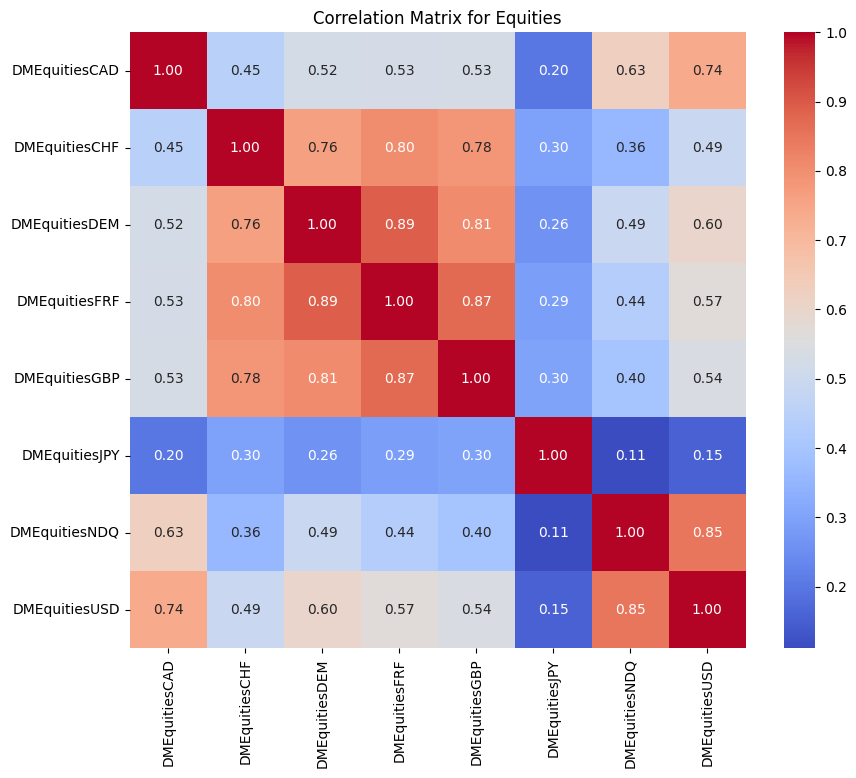

Mean correlation for equities: 0.5231061913085935
Mean correlation for multi-assets: 0.12544557193171507
Mean correlation for equities (monthly): 0.7111229718228712


C:\Users\Emile\AppData\Local\Temp\ipykernel_33480\3841363124.py:31: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return_equities_monthly = prices_equity_daily.resample('M').last().apply(compute_return)
C:\Users\Emile\AppData\Local\Temp\ipykernel_33480\3841363124.py:37: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  rebalancing_dates = prices_multi_asset_daily.resample('Q').last().index
C:\Users\Emile\AppData\Local\Temp\ipykernel_33480\3841363124.py:83: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  strategy_ret_recap.fillna(0, inplace=True)


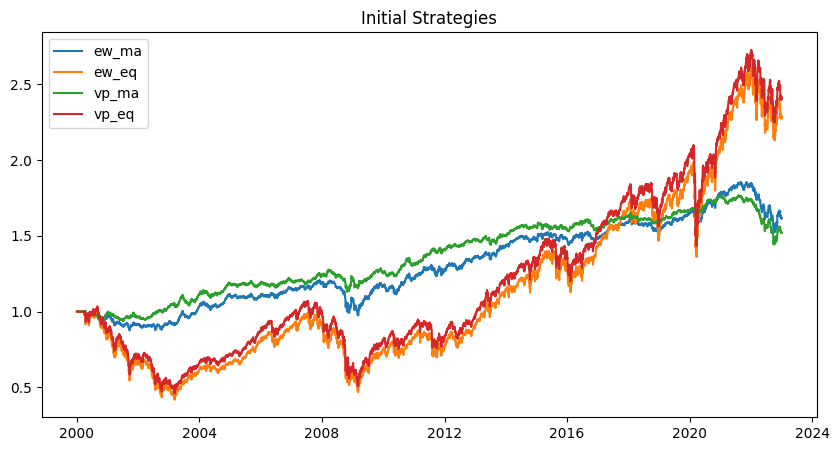

Sharpe Ratio of 4 portfolios:
ew_ma    0.359893
ew_eq    0.220709
vp_ma    0.426925
vp_eq    0.240895
dtype: float64
Volatility of 4 portfolios:
ew_ma    0.056597
ew_eq    0.159545
vp_ma    0.041641
vp_eq    0.155716
dtype: float64
Sharpe Ratio of equities:
DMEquitiesCAD    0.227417
DMEquitiesCHF    0.183116
DMEquitiesDEM    0.072530
DMEquitiesFRF    0.094595
DMEquitiesGBP    0.074829
DMEquitiesJPY    0.083455
DMEquitiesNDQ    0.121746
DMEquitiesUSD    0.202627
dtype: float64
Sharpe Ratio of assets in multi-asset portfolios:
DMEquitiesEUR    0.044064
DMEquitiesUSD    0.202627
BondsDEM         0.528332
BondsGBP         0.293930
BondsUSD         0.386747
DMFXCHF          0.064095
DMFXEUR         -0.049189
DMFXGBP         -0.095814
dtype: float64


In [5]:
# Get data (Multiasset)
prices_multi_asset_daily = eight_assets_prices_daily

# Get data (Equity)
prices_equity_daily = all_assets_prices_daily[['DMEquitiesCAD', 'DMEquitiesCHF',
                                               'DMEquitiesDEM', 'DMEquitiesFRF',
                                               'DMEquitiesGBP', 'DMEquitiesJPY',
                                               'DMEquitiesNDQ', 'DMEquitiesUSD']]

# Calculate returns
return_multi_asset = prices_multi_asset_daily.apply(compute_return)
return_equity = prices_equity_daily.apply(compute_return)

# Calculate correlations for equities
rho_multi_asset = return_multi_asset.corr()
rho_equities = return_equity.corr()

# Plot correlation matrix for equities
plt.figure(figsize=(10, 8))
sns.heatmap(rho_equities, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title("Correlation Matrix for Equities")
plt.show()

# Mean correlations
mean_rho_equities = rho_equities.values[np.triu_indices_from(rho_equities, k=1)].mean()
mean_rho_multi_asset = rho_multi_asset.values[np.triu_indices_from(rho_multi_asset, k=1)].mean()
print(f"Mean correlation for equities: {mean_rho_equities}")
print(f"Mean correlation for multi-assets: {mean_rho_multi_asset}")

# Monthly correlations
return_equities_monthly = prices_equity_daily.resample('M').last().apply(compute_return)
rho_equities_monthly = return_equities_monthly.corr()
mean_rho_equities_monthly = rho_equities_monthly.values[np.triu_indices_from(rho_equities_monthly, k=1)].mean()
print(f"Mean correlation for equities (monthly): {mean_rho_equities_monthly}")

# Rebalancing dates (quarterly)
rebalancing_dates = prices_multi_asset_daily.resample('Q').last().index
# Initialize strategy returns as DataFrames
strategy_ret_ew_ma = pd.DataFrame(index=return_multi_asset.index)
strategy_ret_ew_ma['ew_ma'] = None
strategy_ret_ew_eq = pd.DataFrame(index=return_equity.index)
strategy_ret_ew_eq['ew_eq'] = None
strategy_ret_vp_ma = pd.DataFrame(index=return_multi_asset.index)
strategy_ret_vp_ma['vp_ma'] = None
strategy_ret_vp_eq = pd.DataFrame(index=return_equity.index)
strategy_ret_vp_eq['vp_eq'] = None

equal_weight_ma = np.repeat(1 / return_multi_asset.shape[1], return_multi_asset.shape[1])
equal_weight_eq = np.repeat(1 / return_equity.shape[1], return_equity.shape[1])

for index_t in range(len(rebalancing_dates) - 1):
    t = rebalancing_dates[index_t]

    # Equal weight portfolios
    weight_ew_ma = equal_weight_ma
    weight_ew_eq = equal_weight_eq

    # Data for the past year
    data_one_year_multi_asset = return_multi_asset.loc[t - pd.Timedelta(days=365):t]
    data_one_year_equity = return_equity.loc[t - pd.Timedelta(days=365):t]

    # Calculate covariance matrices and retain volatilities
    vol_ma = np.sqrt(np.diag(cov_mtx(data_one_year_multi_asset, 252)))
    vol_eq = np.sqrt(np.diag(cov_mtx(data_one_year_equity, 252)))

    # Calculate weights for volatility parity
    weight_vp_ma = equal_weight_ma / vol_ma
    weight_vp_ma /= weight_vp_ma.sum()
    weight_vp_eq = equal_weight_eq / vol_eq
    weight_vp_eq /= weight_vp_eq.sum()

    # Rebalancing
    index_return = slice(rebalancing_dates[index_t] + pd.Timedelta(days=1),
                         rebalancing_dates[index_t + 1])

    strategy_ret_ew_ma.loc[index_return,'ew_ma'] = return_multi_asset.loc[index_return].dot(weight_ew_ma)
    strategy_ret_ew_eq.loc[index_return,'ew_eq'] = return_equity.loc[index_return].dot(weight_ew_eq)
    strategy_ret_vp_ma.loc[index_return,'vp_ma'] = return_multi_asset.loc[index_return].dot(weight_vp_ma)
    strategy_ret_vp_eq.loc[index_return,'vp_eq'] = return_equity.loc[index_return].dot(weight_vp_eq)

# Backtest
strategy_ret_recap = strategy_ret_ew_ma.join(strategy_ret_ew_eq.join(strategy_ret_vp_ma.join(strategy_ret_vp_eq)))
strategy_ret_recap.fillna(0, inplace=True)
strategy_cumret_recap = (1+strategy_ret_recap).cumprod()

# Plotting the strategies
plt.figure(figsize=(10, 5))
plt.plot(strategy_cumret_recap)
plt.title("Initial Strategies")
plt.legend(strategy_ret_recap.columns)
plt.show()

# Print Sharpe Ratios
print('Sharpe Ratio of 4 portfolios:')
print(strategy_cumret_recap.apply(compute_sr))

# Print Volatility of 4 portfolios
print('Volatility of 4 portfolios:')
print(strategy_cumret_recap.apply(compute_vol))

# Print Sharpe Ratio of equities
print('Sharpe Ratio of equities:')
print(prices_equity_daily.apply(compute_sr))

# Print Sharpe Ratio of assets in multi-asset portfolios
print('Sharpe Ratio of assets in multi-asset portfolios:')
print(prices_multi_asset_daily.apply(compute_sr))


## 5.2 Indices with target volatility

C:\Users\Emile\AppData\Local\Temp\ipykernel_33480\2051958654.py:74: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  strategy_ret_recap_tv.fillna(0, inplace=True)


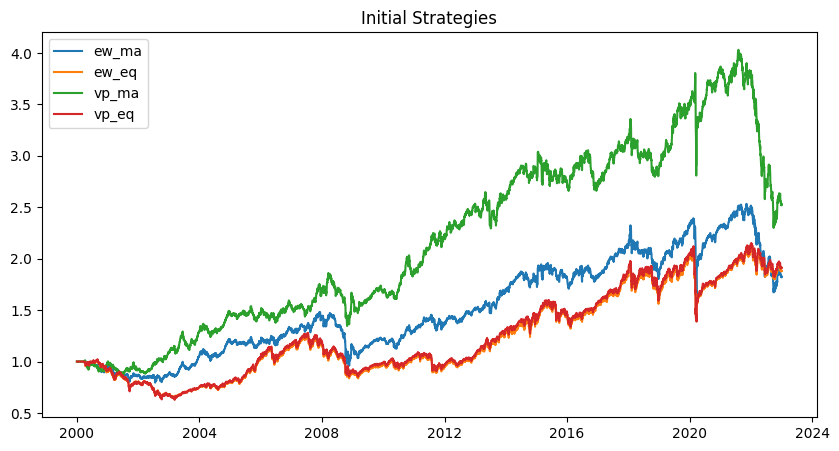

Sharpe Ratio of 4 portfolios:
ew_ma    0.220095
ew_eq    0.232757
vp_ma    0.354353
vp_eq    0.233653
dtype: float64
Volatility of 4 portfolios:
ew_ma    0.116057
ew_eq    0.115512
vp_ma    0.111949
vp_eq    0.117882
dtype: float64
Sharpe Ratio of equities:
DMEquitiesCAD    0.227417
DMEquitiesCHF    0.183116
DMEquitiesDEM    0.072530
DMEquitiesFRF    0.094595
DMEquitiesGBP    0.074829
DMEquitiesJPY    0.083455
DMEquitiesNDQ    0.121746
DMEquitiesUSD    0.202627
dtype: float64
Sharpe Ratio of assets in multi-asset portfolios:
DMEquitiesEUR    0.044064
DMEquitiesUSD    0.202627
BondsDEM         0.528332
BondsGBP         0.293930
BondsUSD         0.386747
DMFXCHF          0.064095
DMFXEUR         -0.049189
DMFXGBP         -0.095814
dtype: float64


In [8]:
# Target Volatility
TARGVOL = 0.1

# Initialize strategy returns as DataFrames
strategy_ret_ew_ma_tv = pd.DataFrame(index=return_multi_asset.index)
strategy_ret_ew_ma_tv['ew_ma'] = None
strategy_ret_ew_eq_tv = pd.DataFrame(index=return_equity.index)
strategy_ret_ew_eq_tv['ew_eq'] = None
strategy_ret_vp_ma_tv = pd.DataFrame(index=return_multi_asset.index)
strategy_ret_vp_ma_tv['vp_ma'] = None
strategy_ret_vp_eq_tv = pd.DataFrame(index=return_equity.index)
strategy_ret_vp_eq_tv['vp_eq'] = None

# Equal weights
equal_weight_ma = np.repeat(1 / return_multi_asset.shape[1], return_multi_asset.shape[1])
equal_weight_eq = np.repeat(1 / return_equity.shape[1], return_equity.shape[1])

# Rebalancing dates (assuming you have a function to get these)
rebalancing_dates = prices_multi_asset_daily.resample('QE').last().index

for index_t in range(len(rebalancing_dates) - 1):
    t = rebalancing_dates[index_t]

    # Data for the past year
    data_one_year_multi_asset = return_multi_asset.loc[:t].tail(252).dropna()
    data_one_year_equity = return_equity.loc[:t].tail(252).dropna()

    # Compute ex ante vol
    vcv_ma = cov_mtx(data_one_year_multi_asset, 252).values
    vcv_eq = cov_mtx(data_one_year_equity, 252).values

    # Calculate volatilities using numpy
    vol_ew_ma = np.sqrt(np.dot(equal_weight_ma, np.dot(vcv_ma, equal_weight_ma)))
    vol_ew_eq = np.sqrt(np.dot(equal_weight_eq, np.dot(vcv_eq, equal_weight_eq)))

    # Compute leverage
    lev_ew_ma = TARGVOL / vol_ew_ma
    lev_ew_eq = TARGVOL / vol_ew_eq
    # Adjust weights for target volatility
    weight_ew_ma_tv = equal_weight_ma * lev_ew_ma
    weight_ew_eq_tv = equal_weight_eq * lev_ew_eq

    # Compute covariance matrix for volatility parity
    vol_ma = np.sqrt(np.diag(cov_mtx(data_one_year_multi_asset, 252).values))
    vol_eq = np.sqrt(np.diag(cov_mtx(data_one_year_equity, 252).values))

    weight_vp_ma = equal_weight_ma / vol_ma
    weight_vp_ma /= weight_vp_ma.sum()
    weight_vp_eq = equal_weight_eq / vol_eq
    weight_vp_eq /= weight_vp_eq.sum()

    vol_vp_ma = np.sqrt(np.dot(weight_vp_ma, np.dot(vcv_ma, weight_vp_ma)))
    vol_vp_eq = np.sqrt(np.dot(weight_vp_eq, np.dot(vcv_eq, weight_vp_eq)))

    # Compute leverage for volatility parity
    lev_vp_ma = TARGVOL / vol_vp_ma
    lev_vp_eq = TARGVOL / vol_vp_eq

    weight_vp_ma_tv = weight_vp_ma * lev_vp_ma
    weight_vp_eq_tv = weight_vp_eq * lev_vp_eq

    # Assign returns for the index range
    # Rebalancing
    index_return = slice(rebalancing_dates[index_t] + pd.Timedelta(days=1),
                         rebalancing_dates[index_t + 1])

    strategy_ret_ew_ma_tv.loc[index_return, 'ew_ma'] = return_multi_asset.loc[index_return].dot(weight_ew_ma_tv)
    strategy_ret_ew_eq_tv.loc[index_return, 'ew_eq'] = return_equity.loc[index_return].dot(weight_ew_eq_tv)
    strategy_ret_vp_ma_tv.loc[index_return, 'vp_ma'] = return_multi_asset.loc[index_return].dot(weight_vp_ma_tv)
    strategy_ret_vp_eq_tv.loc[index_return, 'vp_eq'] = return_equity.loc[index_return].dot(weight_vp_eq_tv)

# Backtest
strategy_ret_recap_tv = strategy_ret_ew_ma_tv.join(strategy_ret_ew_eq_tv.join(strategy_ret_vp_ma_tv.join(strategy_ret_vp_eq_tv)))
strategy_ret_recap_tv.fillna(0, inplace=True)
strategy_cumret_recap_tv = (1+strategy_ret_recap_tv).cumprod()

# Plotting the strategies
plt.figure(figsize=(10, 5))
plt.plot(strategy_cumret_recap_tv)
plt.title("Initial Strategies")
plt.legend(strategy_ret_recap_tv.columns)
plt.show()

# Print Sharpe Ratios
print('Sharpe Ratio of 4 portfolios:')
print(strategy_cumret_recap_tv.apply(compute_sr))

# Print Volatility of 4 portfolios
print('Volatility of 4 portfolios:')
print(strategy_cumret_recap_tv.apply(compute_vol))

# Print Sharpe Ratio of equities
print('Sharpe Ratio of equities:')
print(prices_equity_daily.apply(compute_sr))

# Print Sharpe Ratio of assets in multi-asset portfolios
print('Sharpe Ratio of assets in multi-asset portfolios:')
print(prices_multi_asset_daily.apply(compute_sr))


# 6 - A first model 

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.872
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     734.7
Date:                Fri, 16 Jan 2026   Prob (F-statistic):          1.98e-191
Time:                        16:48:06   Log-Likelihood:                -534.95
No. Observations:                 438   AIC:                             1080.
Df Residuals:                     433   BIC:                             1100.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            2.1229      0.063     33.951   

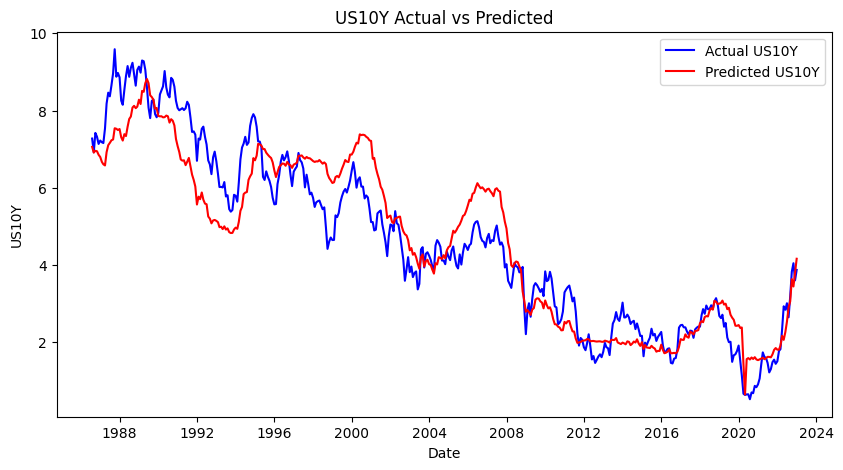

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.784
Method:                 Least Squares   F-statistic:                     108.7
Date:                Fri, 16 Jan 2026   Prob (F-statistic):           3.98e-38
Time:                        16:48:06   Log-Likelihood:                -34.284
No. Observations:                 120   AIC:                             78.57
Df Residuals:                     115   BIC:                             92.50
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            3.1745      0.099     32.225   

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

model_assets_prices = pd.read_csv(f"{mainpath}DataForModelTutorial1.csv", index_col="Dates", sep=";", parse_dates=["Dates"], dayfirst=True)

# Transformations
model_assets_prices_for_model = model_assets_prices.copy()
model_assets_prices_for_model['CorePCE'] = model_assets_prices_for_model['CorePCE'].pct_change()
model_assets_prices_for_model['Unemployment'] = model_assets_prices_for_model['Unemployment'].pct_change()
sofr2_rate = (100 - model_assets_prices_for_model['SOFR2']) / 100
sofr6_rate = (100 - model_assets_prices_for_model['SOFR6']) / 100
model_assets_prices_for_model['SOFRSpread'] = sofr6_rate - sofr2_rate

# Prepare inputs for OLS
inputs = pd.DataFrame({
    'CorePCE': model_assets_prices_for_model['CorePCE'],
    'Unemployment': model_assets_prices_for_model['Unemployment'],
    'SOFRSpread': model_assets_prices_for_model['SOFRSpread'],
    'FedFunds': model_assets_prices_for_model['FedFunds']
})

# Full history OLS regression
data_for_ols = pd.DataFrame({'y': model_assets_prices_for_model['US10Y'], **inputs})
data_for_ols = data_for_ols.replace([np.inf, -np.inf], np.nan).dropna()
X = sm.add_constant(data_for_ols.drop(columns='y'))  # Add constant for intercept
lin_model_full = sm.OLS(data_for_ols['y'], X).fit()


# Summary of the full model
print(lin_model_full.summary())

# Predictions
data_for_ols['US10Yhat'] = lin_model_full.predict(X)


# Quick and dirty chart
plt.figure(figsize=(10, 5))
plt.plot(data_for_ols.index, data_for_ols['y'], label='Actual US10Y', color='blue')
plt.plot(data_for_ols.index, data_for_ols['US10Yhat'], label='Predicted US10Y', color='red')
plt.title('US10Y Actual vs Predicted')
plt.xlabel('Date')
plt.ylabel('US10Y')
plt.legend()
plt.show()

# Last 10 years OLS regression
last_10_years = data_for_ols.tail(120)  # Assuming the DataFrame is sorted by date
X_last_10y = sm.add_constant(last_10_years.drop(columns=['y','US10Yhat']))
lin_model_last_10y = sm.OLS(last_10_years['y'], X_last_10y).fit()

# Summary of the last 10 years model
print(lin_model_last_10y.summary())

# Last 5 years OLS regression
last_5_years = data_for_ols.tail(60)  # Assuming the DataFrame is sorted by date
X_last_5y = sm.add_constant(last_5_years.drop(columns=['y','US10Yhat']))
lin_model_last_5y = sm.OLS(last_5_years['y'], X_last_5y).fit()

# Summary of the last 5 years model
print(lin_model_last_5y.summary())
